<img src = "../images/logos.png" align = "center">
<br>
<h1 align=center><font size = 5>Actions Apple</font></h1>
<h2 align=center><font size = 5>Séries Temporelles</font></h2>

### Introduction:

L'étude portera ici sir le prix des actions Apple entre deux dates données.
Les données seront téléchargées depuis [yahoo finance](https://finance.yahoo.com/)


### Step 1. Installer puis importer la librairaie yahoo finances : yfinance
Dans le terminal anaconda prompt taper : `pip install yfinance`

In [2]:
%pip install yfinance


  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22622 sha256=c791006b5482ecea3c711480100f0a994c0567dfa277781ba8223021424a9a64
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b4\c3\39\9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=d81231f450d3541abc113fb666e84e2a6a0bdd7faf6456a8925b9903ce267118
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [3]:
import pandas as pd
import yfinance as yf
from datetime import *

### Etape 2. Importer le jeu de données en utilisant le script suivant :

In [4]:
apple_df = yf.download('AAPL', 
                      start='1980-01-01', 
                      end=date.today(), 
                      progress=False)
apple_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100266,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095035,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088059,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090239,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092855,73449600
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098522,48630400
1980-12-22,0.132254,0.132812,0.132254,0.132254,0.103317,37363200
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107677,46950400
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113344,48003200


### Etape 3 : Afficher le nombre d'enregistrements

In [5]:
apple_df.shape

(10067, 6)

### Etape 4 : Afficher l'index du dataframe obtenu

In [6]:
apple_df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13'],
              dtype='datetime64[ns]', name='Date', length=10067, freq=None)

### Etape 5.  Afficher les types de données des colonnes du dataframe

In [7]:
apple_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Etape 6.  Y a t-il des dates dupliquées ?

In [8]:
apple_df.index.is_unique

True

### Etape 7. Afficher uniquement les données des derniers jours ouvrés de chaque mois
Consulter la documentation [ici](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Frequencies-and-Offsets)<br>
*Attention il risque d'y avoir des valeurs manquantes, utiliser alors la fonction intersection*


In [9]:
apple_month = apple_df.resample('BM').mean()
index_month=apple_month.index
apple_df.loc[apple_df.index.intersection(index_month)]

#ap ple_df.loc[apple_df.index.year==2014]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.481461,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.097466,392467600
2014-01-06,19.194643,19.528572,19.057142,19.426071,17.190701,412610800
2014-01-07,19.440001,19.498571,19.211428,19.287144,17.067759,317209200
2014-01-08,19.243214,19.484285,19.238928,19.409286,17.175852,258529600
...,...,...,...,...,...,...
2014-12-24,28.145000,28.177500,28.002501,28.002501,25.301731,57918400
2014-12-26,28.025000,28.629999,28.002501,28.497499,25.748987,134884000
2014-12-29,28.447500,28.692499,28.424999,28.477501,25.730921,110395600


### Etape 8.  Combien de jours y at-il entre le plus ancien enregisrement et le plus récent ?

In [9]:
(apple_df.index.max() - apple_df.index.min()).days

14476

### Step 9. Représenter graphiquement les variations de la colonne 'Adj Close' sur une figure de dimension 13.5 x 9 pouces

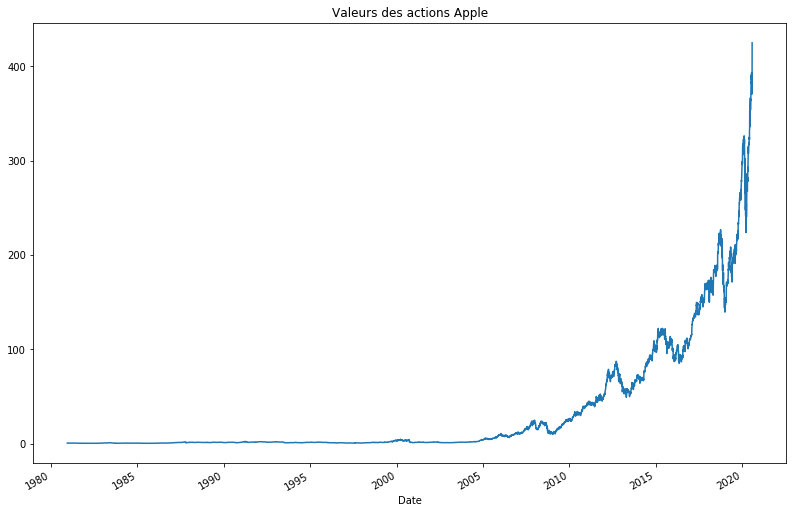

In [11]:
# makes the plot and assign it to a variable
appl_adj = apple_df['Adj Close'].plot(title = "Valeurs des actions Apple")

# changes the size of the graph
fig = appl_adj.get_figure()
fig.set_size_inches(13.5, 9)

<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND